### Exploratory Data Analysis and Visualization of NYC Airbnb Dataset

In [1]:
# Imports go here

%matplotlib inline
import pandas as pd
import altair as alt
import json
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# saving data into a file rather than embedding into the chart
alt.data_transformers.enable('json') 
alt.renderers.enable('notebook')
#alt.renderers.enable('jupyterlab')

RendererRegistry.enable('notebook')

In [2]:
# Loading the data from csv file into dataframes

# listing data
listing_filepath = r"C:\Users\shilp\IUB_DS\fall-2019\data_viz-course\project\project_data\listings.csv"
df_listing = pd.read_csv(listing_filepath)
df_listing.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
1,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,279,2019-08-29,4.62,1,192
2,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
3,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,75,2019-07-21,0.59,1,13
4,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.39,1,0


In [164]:
# Reviews data
reviews_filepath = r"C:\Users\shilp\IUB_DS\fall-2019\data_viz-course\project\project_data\reviews.csv"
df_reviews = pd.read_csv(reviews_filepath)
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2818,1191,2009-03-30,10952,Lam,Daniel is really cool. The place was nice and ...
1,2818,1771,2009-04-24,12798,Alice,Daniel is the most amazing host! His place is ...
2,2818,1989,2009-05-03,11869,Natalja,We had such a great time in Amsterdam. Daniel ...
3,2818,2797,2009-05-18,14064,Enrique,Very professional operation. Room is very clea...
4,2818,3151,2009-05-25,17977,Sherwin,Daniel is highly recommended. He provided all...


In [113]:
# Calendar data
calendar_filepath = r"C:\Users\shilp\IUB_DS\fall-2019\data_viz-course\project\project_data\calendar.csv"
df_calendar = pd.read_csv(calendar_filepath)
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,148132,2019-09-14,f,38,38,2.0,7.0
1,148132,2019-09-15,f,37,37,2.0,7.0
2,148132,2019-09-16,f,37,37,2.0,7.0
3,148132,2019-09-17,f,37,37,2.0,7.0
4,148132,2019-09-18,f,37,37,2.0,7.0


In [24]:
geojsonpath = r"C:\\Users\\shilp\\IUB_DS\\fall-2019\\data_viz-course\\project\\project_data\\neighbourhoods.json"
with open(geojsonpath) as json_file:
    data_geojson = json.load(json_file)

### Spatial Data Analysis:

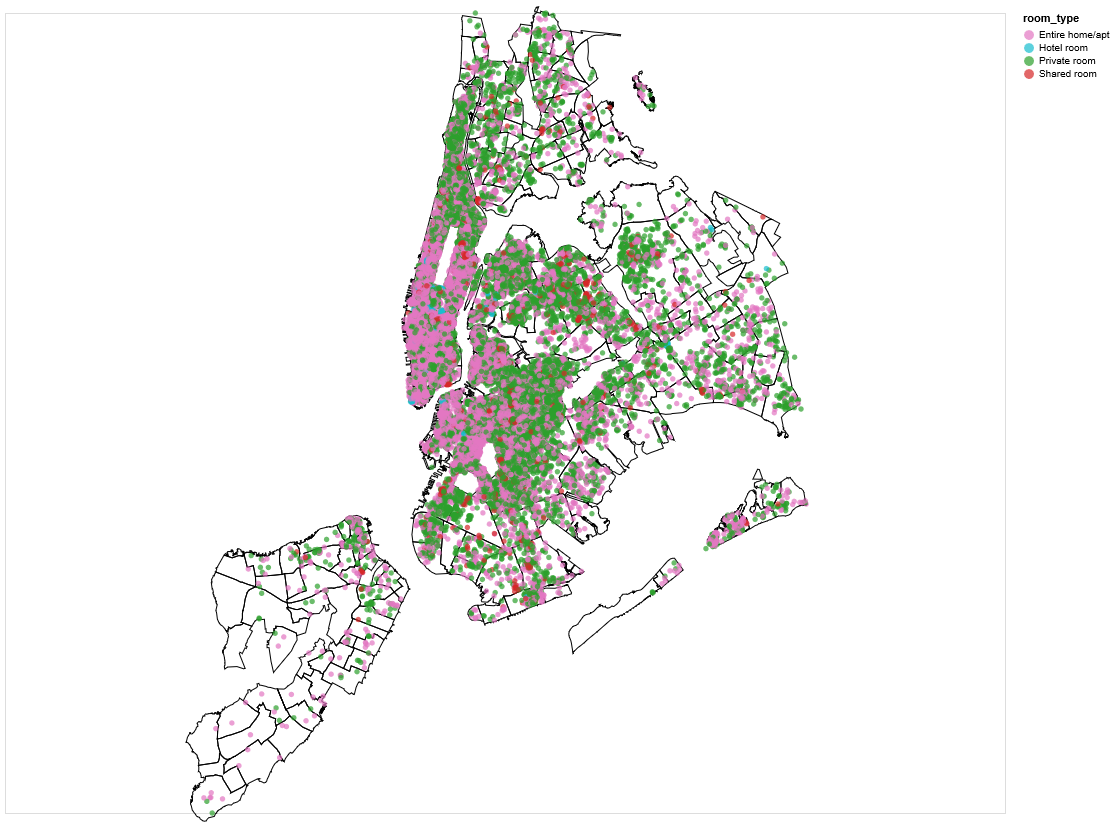

In [40]:
# NYC neighbourhood background

background = alt.Chart(alt.Data(values=data_geojson)).mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode().properties(
        width=1000,
        height=800
    )

base = alt.Chart(df_listing).mark_circle(size=30).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color=alt.Color('room_type:N',scale={'range' : ['#e377c2', '#17becf', '#2ca02c', '#d62728']})
).project(
    type='albersUsa'
).properties(
    width=800,
    height=600,
)

background + base

In [33]:
# Different types of properties rented in NYC
property_type = df_listing.groupby(['neighbourhood_group','room_type']).count().id.to_frame(name = 'count').reset_index()
property_type.head()

,neighbourhood_group,room_type,count
0,Bronx,Entire home/apt,4
1,Bronx,Private room,7
2,Brooklyn,Entire home/apt,8621
3,Brooklyn,Hotel room,65
4,Brooklyn,Private room,9100


In [143]:
df_listing.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

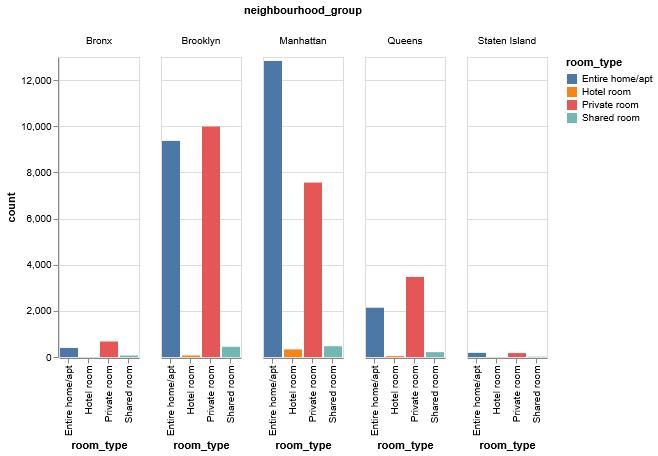

In [8]:
# How the different types of property vary by neighbourhood

alt.Chart(property_type).mark_bar().encode(
    x='room_type:O',
    y='count:Q',
    color='room_type:N',
    column='neighbourhood_group:N'
)

In [9]:
# Only taking the top 5
df_listing_cnt = df_listing.groupby(['neighbourhood','room_type']).count().id.to_frame(name = 'count').reset_index()
df_listing_desc = df_listing_cnt.nlargest(20,'count')

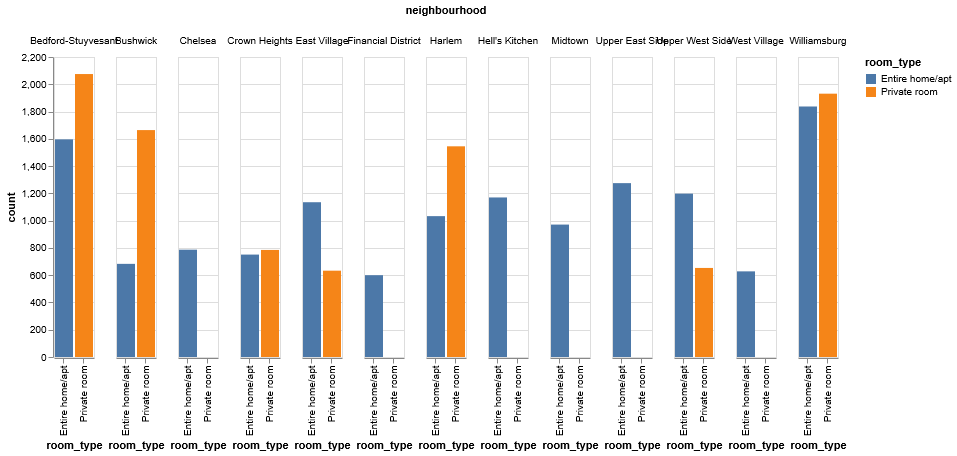

In [10]:
# How the different types of property vary by neighbourhood

alt.Chart(df_listing_desc).mark_bar().encode(
    x='room_type:O',
    y='count:Q',
    color='room_type:N',
    column='neighbourhood:N'
)

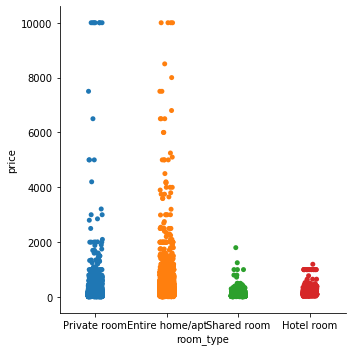

In [11]:
#catplot room type and price
sns.catplot(x="room_type", y="price", data=df_listing);

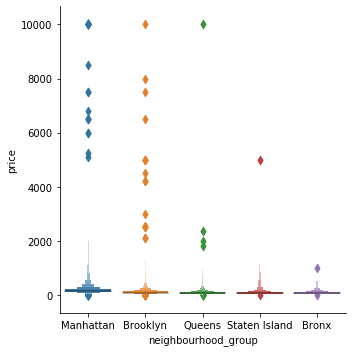

In [148]:
#catplot neighbourhood_group and price
sns.catplot(x="neighbourhood_group", y="price", kind="boxen",
            data=df_listing);

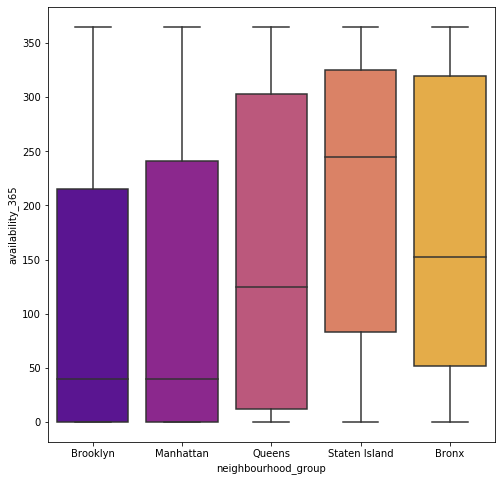

In [163]:
#boxplot neighbourhood_group and room availability
plt.figure(figsize=(8,8))
df1 = sns.boxplot(data=df_listing, x='neighbourhood_group',y='availability_365',palette='plasma')

### Plotting a Choropleth map to show the variation in the price of listings in the NYC region:
  For this we take the data from the listings dataframe where we have the price for each listing with their latitude and longitude and the neighbourhoods json where we have the coordinates of the polygons in the map.

In [25]:
# Convert the geojson to geopandas dataframe
map_df = gpd.GeoDataFrame.from_features(data_geojson)
map_df.head()

,geometry,neighbourhood,neighbourhood_group
0,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ...",Bayswater,Queens
1,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ...",Allerton,Bronx
2,"MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ...",City Island,Bronx
3,"MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ...",Ditmars Steinway,Queens
4,"MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ...",Ozone Park,Queens


In [26]:
# checking for number of elements
map_df.count()

geometry               233
neighbourhood          233
neighbourhood_group    233
dtype: int64

In [27]:
# Checking for null values in any column in map dataframe
len(map_df) - map_df.count()

geometry               0
neighbourhood          0
neighbourhood_group    0
dtype: int64

In [28]:
# The unique key in the geojson is {neighbourhood','neighbourhood_group} and checking for the duplicates across this key
duplicates = map_df.duplicated(['neighbourhood','neighbourhood_group'])
if any(duplicates):
    print(map_df.loc[duplicates], end='\n\n')

                                              geometry neighbourhood  \
22   MULTIPOLYGON (((-73.76507 40.61357, -73.76502 ...     Bayswater   
44   MULTIPOLYGON (((-73.78457 40.85972, -73.78471 ...   City Island   
127  MULTIPOLYGON (((-73.86127 40.65827, -73.86096 ...  Howard Beach   

    neighbourhood_group  
22               Queens  
44                Bronx  
127              Queens  



In [29]:
# Dropping the duplicates from geojson
map_df.drop_duplicates(subset=['neighbourhood','neighbourhood_group'], inplace=True)

In [30]:
map_df.count()

geometry               230
neighbourhood          230
neighbourhood_group    230
dtype: int64

In [31]:
# Exclude location outliers from the listings data
df_listing = df_listing[abs(df_listing['latitude'] - df_listing['latitude'].median()) < 0.08]
df_listing = df_listing[abs(df_listing['longitude'] - df_listing['longitude'].median()) < 0.08]

In [32]:
df_price_group= df_listing.groupby(['neighbourhood','neighbourhood_group'], as_index = False).agg({"price": "mean"})
df_price_group.head()

,neighbourhood,neighbourhood_group,price
0,Astoria,Queens,113.564917
1,Battery Park City,Manhattan,170.309524
2,Bedford-Stuyvesant,Brooklyn,107.647040
3,Boerum Hill,Brooklyn,170.102041
4,Borough Park,Brooklyn,59.200000


In [33]:
df_price_group.count()

neighbourhood          73
neighbourhood_group    73
price                  73
dtype: int64

In [34]:
# Creating a merged dataframe with the listing data as well as the map data loaded previously into a dataframe

merged_df = map_df.merge(df_price_group, on=['neighbourhood','neighbourhood_group'], how='inner')

In [35]:
# Converting the merged data frame to a json for plotting a choropleth in altair

choro_json = json.loads(merged_df.to_json())
choro_data = alt.Data(values=choro_json['features'])

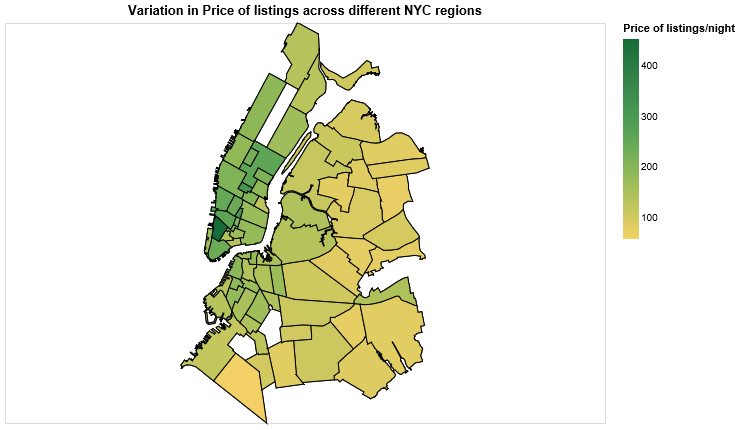

In [36]:
# Layput for the choropleth showing the variation of prices across the different NYC regions

# Base layer of geo data
base = alt.Chart(choro_data, title = 'Variation in Price of listings across different NYC regions').mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
    ).properties(
        width=600,
        height=400
    )

# Adding the choro layer for the variation in price
choro = alt.Chart(choro_data).mark_geoshape(
        fill='lightgray',
        stroke='black'
    ).encode(
        alt.Color("properties.price", 
                  type='quantitative', 
                  scale=alt.Scale(scheme='goldgreen'),
                  title = "Price of listings/night"),
    tooltip=['properties.neighbourhood:O','properties.neighbourhood_group:O']
        )

base + choro

### Plotting a Choropleth map to show the variation in the popularity of listings in the NYC region:
For this we take the data from the listings dataframe where we have the column with the "number of reviews".We will take this number as an indicator for popularity.The larger the number,the more popular the listing.

In [37]:
# Grouping the number of reviews by the neighbourhood

df_reviews_group = df_listing.groupby(['neighbourhood','neighbourhood_group'], as_index = False).agg({"number_of_reviews": "sum"})
df_reviews_group.head()

,neighbourhood,neighbourhood_group,number_of_reviews
0,Astoria,Queens,19827
1,Battery Park City,Manhattan,648
2,Bedford-Stuyvesant,Brooklyn,113131
3,Boerum Hill,Brooklyn,4570
4,Borough Park,Brooklyn,986


In [38]:
# Creating a merged dataframe with the review data as well as the map data loaded previously into a dataframe

merged_df_reviews = map_df.merge(df_reviews_group, on=['neighbourhood','neighbourhood_group'], how='inner')

In [39]:
merged_df_reviews .count()

geometry               73
neighbourhood          73
neighbourhood_group    73
number_of_reviews      73
dtype: int64

In [40]:
# Converting the merged data frame to a json for plotting a choropleth in altair

choro_json_reviews = json.loads(merged_df_reviews.to_json())
choro_data_reviews = alt.Data(values=choro_json_reviews['features'])

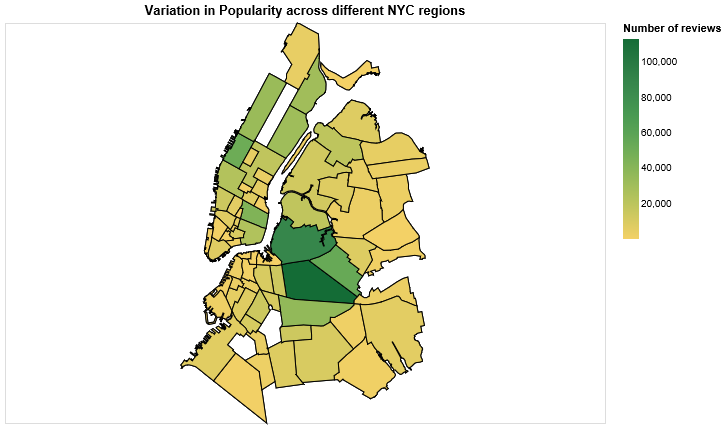

In [41]:
# Layput for the choropleth showing the variation of prices across the different NYC regions

# Base layer of geo data
base = alt.Chart(choro_data_reviews, title = 'Variation in Popularity across different NYC regions').mark_geoshape(
        stroke='black',
        strokeWidth=1
    ).encode(
    ).properties(
        width=600,
        height=400
    )

# Adding the choro layer for the variation in price
choro = alt.Chart(choro_data_reviews).mark_geoshape(
        fill='lightgray',
        stroke='black'
    ).encode(
        alt.Color("properties.number_of_reviews", 
                  type='quantitative', 
                  scale=alt.Scale(scheme='goldgreen'),
                  title = "Number of reviews"),
    tooltip=['properties.neighbourhood:O','properties.neighbourhood_group:O']
        )

base + choro

### Demand and Price Analysis: 
Here we will analyze how the price and demand of listings in NYC neighbourhood has changed over time.The dimensions for this data are date of a listing,price and number_of_reviews and are all taken from the listing dataset.

In [3]:
# Removing all the rows with null column values in the columns we are concerned with
df_listing = df_listing.dropna()

In [4]:
# Creating a dataframe with a subset of columns for time-based analysis
time_analysis_cols = ['last_review','price','number_of_reviews']

In [5]:
df_time_analysis = df_listing.loc[:,time_analysis_cols]

In [6]:
df_time_analysis.head()

,last_review,price,number_of_reviews
1,2019-08-29,89,279
2,2018-11-19,80,9
3,2019-07-21,200,75
4,2017-10-05,60,49
5,2019-08-27,79,443


In [7]:
# Converting the column last_review to datetime type
df_time_analysis['last_review']= pd.to_datetime(df_time_analysis['last_review'])

In [8]:
df_time_analysis.dtypes

last_review          datetime64[ns]
price                         int64
number_of_reviews             int64
dtype: object

In [9]:
# Setting the last_review as index for time-based analysis

df_time_analysis = df_time_analysis.set_index('last_review')

In [10]:
# Checking if the date column has been set as index 
df_time_analysis.head()

,price,number_of_reviews
last_review,,
2019-08-29,89,279
2018-11-19,80,9
2019-07-21,200,75
2017-10-05,60,49
2019-08-27,79,443


In [11]:
# Using the datetimeindex property add additional attributes such as year, month, day

df_time_analysis['Year'] = df_time_analysis.index.year
df_time_analysis['Month'] = df_time_analysis.index.month
df_time_analysis['Weekday Name'] = df_time_analysis.index.weekday_name
# Display a random sampling of 5 rows
df_time_analysis.sample(5, random_state=0)

,price,number_of_reviews,Year,Month,Weekday Name
last_review,,,,,
2019-09-02,319,21,2019,9,Monday
2019-08-18,100,23,2019,8,Sunday
2015-09-08,145,12,2015,9,Tuesday
2019-08-28,70,82,2019,8,Wednesday
2019-08-12,137,9,2019,8,Monday


#### Price and Demand Comparison through plots :

In [14]:
# Selecting the column price for plotting
price_data = df_time_analysis.loc[:,'price']
price_data_df = price_data.to_frame().reset_index()
price_data_df.head()

,last_review,price
0,2019-08-29,89
1,2018-11-19,80
2,2019-07-21,200
3,2017-10-05,60
4,2019-08-27,79


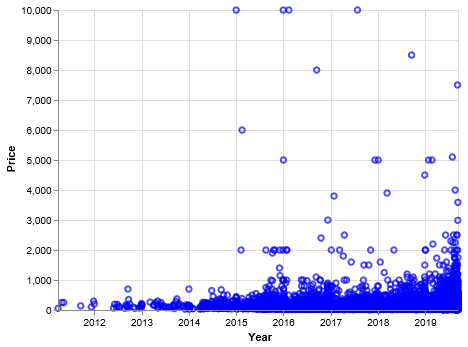

In [15]:
# Plotting the price data over the  years

base = alt.Chart(price_data_df).mark_point(color='blue').encode(
    x=alt.X('last_review:T',
            axis=alt.Axis(title=' Year')),
    y=alt.Y('price:Q',
            axis=alt.Axis(title=' Price'))
)

base

In [12]:
# Selecting the column number_of_reviews(poproprtionl to demand) for plotting

demand_score_data = df_time_analysis.loc[:,'number_of_reviews']
demand_score_df = demand_score_data.to_frame().reset_index()

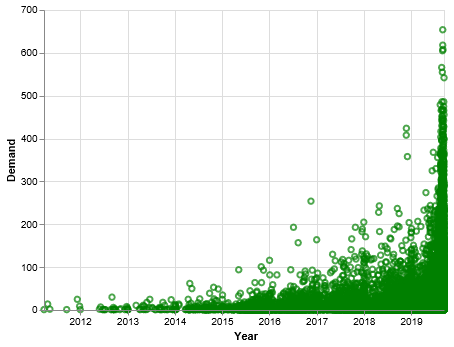

In [101]:
# Plotting the demand data over the years

points = alt.Chart(demand_score_df).mark_point(color='green').encode(
    x=alt.X('last_review:T',
            axis=alt.Axis(title=' Year')),
    y=alt.Y('number_of_reviews:Q',
            axis=alt.Axis(title='Demand'))
)

points

#### Boxplot to see the distribution of price.

(array([3.8568e+04, 8.8000e+01, 2.8000e+01, 5.0000e+00, 1.0000e+00,
        6.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([    0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,  7000.,
         8000.,  9000., 10000.]),
 <a list of 10 Patch objects>)

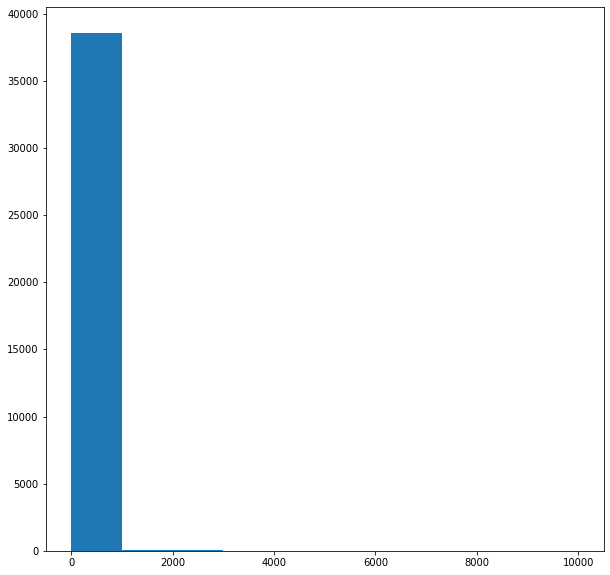

In [21]:
plt.figure(figsize=(10,10))
plt.hist(price_data_df.price)

Here, we can clearly see that the distribution has a long tail and is a skewed distribution.

#### Seasonality in Price: 
Here we would analyze the change in price over the months in 2019,2018 and 2017.

In [93]:
# Selecting only 2017 data for plotting

price_2017= df_time_analysis.loc['2017-01':'2017-12','price']
price_2017_df = price_2017.to_frame().reset_index()

# Selecting only 2018 data for plotting

price_2018= df_time_analysis.loc['2018-01':'2018-12','price']
price_2018_df = price_2018.to_frame().reset_index()

# Selecting only 2019 data for plotting

price_2019= df_time_analysis.loc['2019-01':'2019-12','price']
price_2019_df = price_2019.to_frame().reset_index()

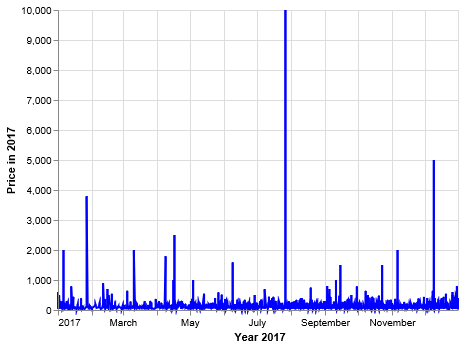

In [97]:
# Plotting 2017 data

points_2017 = alt.Chart(price_2017_df).mark_line(color='blue').encode(
    x=alt.X('last_review:T',
            axis=alt.Axis(title=' Year 2017')),
    y=alt.Y('price:Q',
            axis=alt.Axis(title=' Price in 2017 '))
)

points_2017

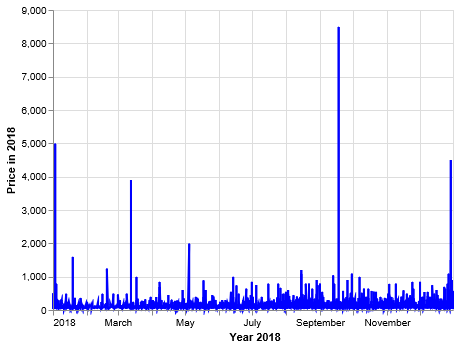

In [98]:
# Plotting 2018 data

points_2018 = alt.Chart(price_2018_df).mark_line(color='blue').encode(
    x=alt.X('last_review:T',
            axis=alt.Axis(title=' Year 2018')),
    y=alt.Y('price:Q',
            axis=alt.Axis(title=' Price in 2018 '))
)

points_2018

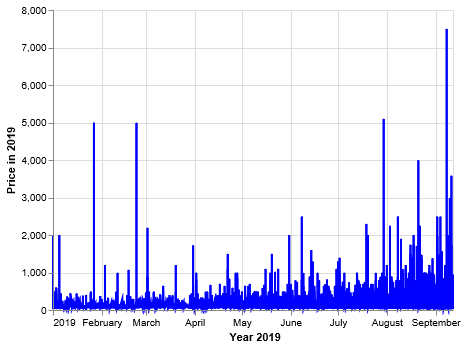

In [99]:
# Plotting 2018 data

points_2019 = alt.Chart(price_2019_df).mark_line(color='blue').encode(
    x=alt.X('last_review:T',
            axis=alt.Axis(title=' Year 2019')),
    y=alt.Y('price:Q',
            axis=alt.Axis(title=' Price in 2019 '))
)

points_2019

#### Seasonality in Demand:
Here we would analyze the change in demand over the months in 2019,2018 and 2017

In [105]:
# Selecting only 2017 data for plotting

demand_2017= df_time_analysis.loc['2017-01':'2017-12','number_of_reviews']
demand_2017_df = demand_2017.to_frame().reset_index()

# Selecting only 2018 data for plotting

demand_2018= df_time_analysis.loc['2018-01':'2018-12','number_of_reviews']
demand_2018_df = demand_2018.to_frame().reset_index()

# Selecting only 2019 data for plotting

demand_2019= df_time_analysis.loc['2019-01':'2019-12','number_of_reviews']
demand_2019_df = demand_2019.to_frame().reset_index()

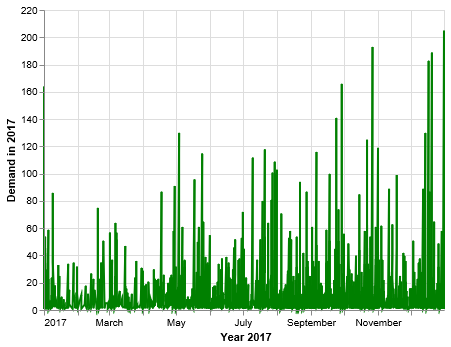

In [109]:
# Plotting 2017 data

d_2017 = alt.Chart(demand_2017_df).mark_line(color='green').encode(
    x=alt.X('last_review:T',
            axis=alt.Axis(title=' Year 2017')),
    y=alt.Y('number_of_reviews:Q',
            axis=alt.Axis(title=' Demand in 2017 '))
)

d_2017

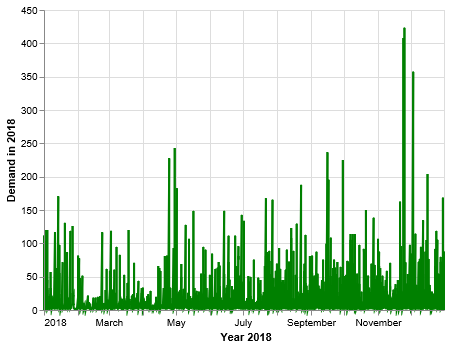

In [110]:
# Plotting 2018 data

d_2018 = alt.Chart(demand_2018_df).mark_line(color='green').encode(
    x=alt.X('last_review:T',
            axis=alt.Axis(title=' Year 2018')),
    y=alt.Y('number_of_reviews:Q',
            axis=alt.Axis(title=' Demand in 2018 '))
)

d_2018

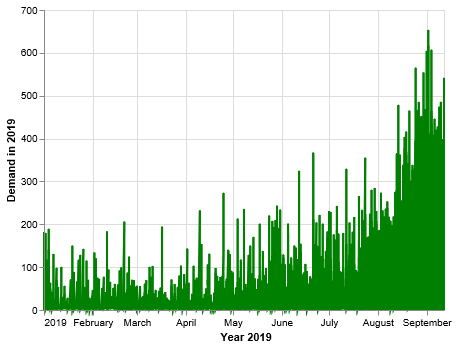

In [111]:
# Plotting 2019 data

d_2019 = alt.Chart(demand_2019_df).mark_line(color='green').encode(
    x=alt.X('last_review:T',
            axis=alt.Axis(title=' Year 2019')),
    y=alt.Y('number_of_reviews:Q',
            axis=alt.Axis(title=' Demand in 2019 '))
)

d_2019

#### Price Analysis on weekdays and weekends through boxplot for the year 2018 and 2019:

In [129]:
price_2019_18 = df_time_analysis.loc['2018-01':'2019-12',['price','Weekday Name']]

In [141]:
price_2019_18 = price_2019_18.reset_index()

In [142]:
price_2019_18.head()

,last_review,price,Weekday Name
0,2019-08-29,89,Thursday
1,2018-11-19,80,Monday
2,2019-07-21,200,Sunday
3,2019-08-27,79,Tuesday
4,2019-07-29,150,Monday


<Figure size 720x720 with 0 Axes>

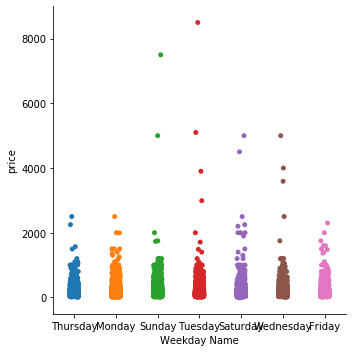

In [161]:
# Categorial plot to see the prices on different days of the week
plt.figure(figsize=(10,10))
sns.catplot(x='Weekday Name', y='price', data=price_2019_18)

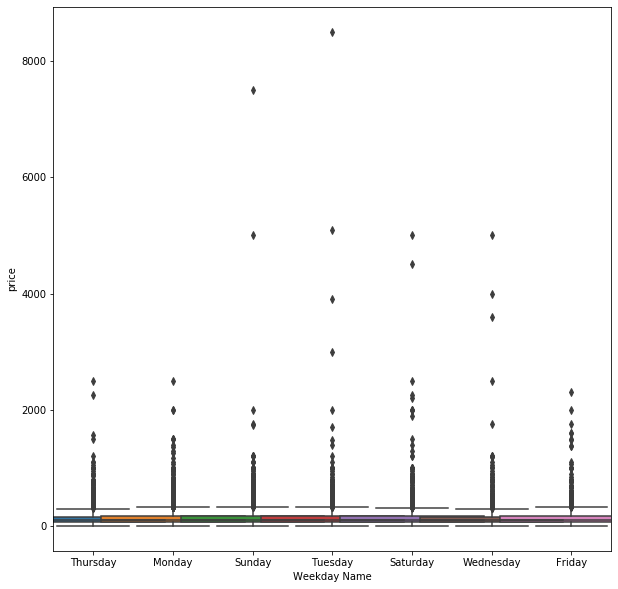

In [160]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Weekday Name', y='price', data=price_2019_18, width=1.8)

In [154]:
# In the above plot most values are centered around 0, we can take the log of price to see them more clearly

price_2019_18['log_price'] = np.log(price_2019_18['price'])

C:\Users\shilp\Anaconda3\envs\dviz\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


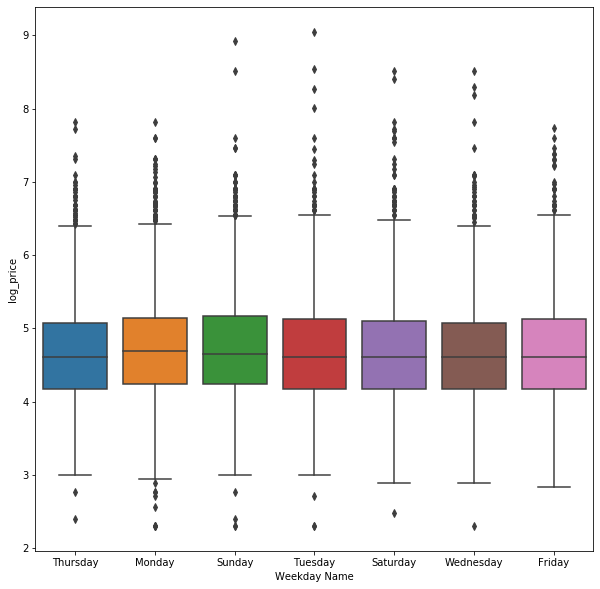

In [159]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Weekday Name', y='log_price', data=price_2019_18, width=0.8)

### Analysis of comments in Review dataset using WordCloud:

In [169]:
text = df_reviews.comments.values

In [176]:
# Instantiating wordcloud
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))

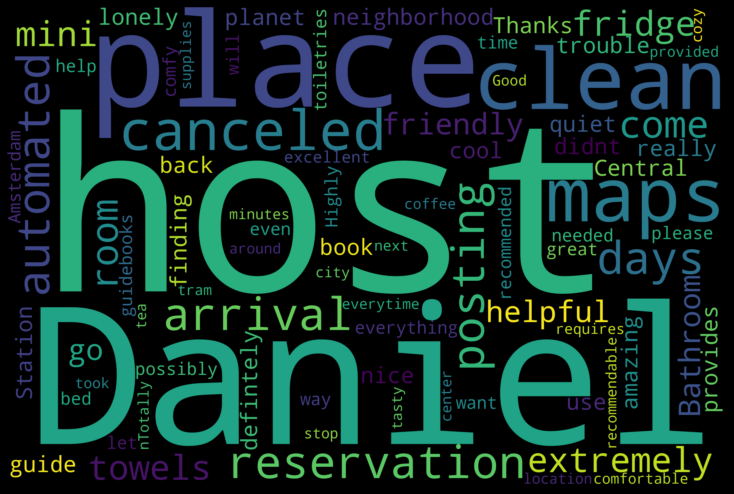

In [177]:
# Plotting wordcloud
fig = plt.figure(
    figsize = (10, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()